In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

response = requests.get(URL)

if response.status_code == 200:
    data = io.StringIO(response.text)
    df = pd.read_csv(data)
else:
    print(response.status_code())



In [3]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [4]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [5]:
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Month']=pd.to_datetime(df['Date']).dt.month

#### Estimated fire area over Time

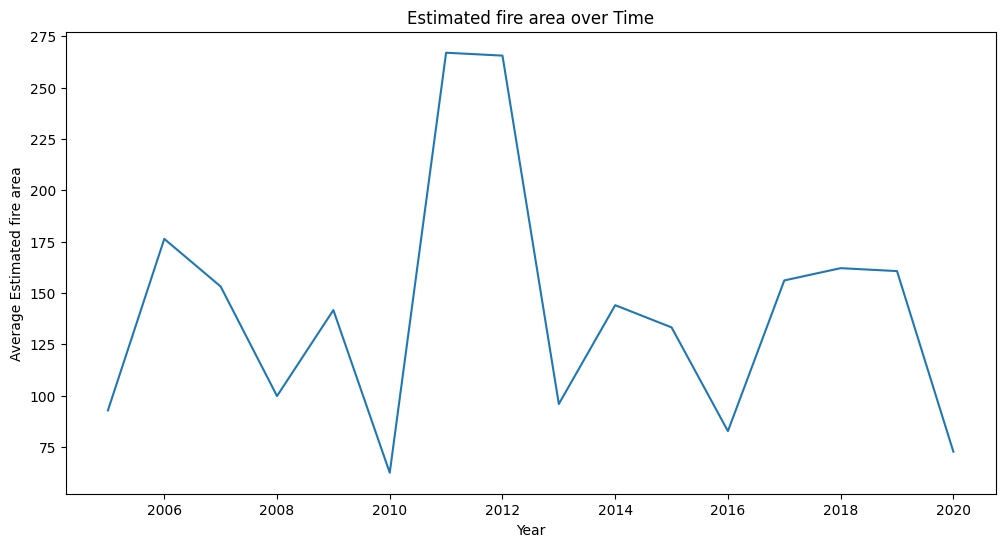

In [6]:
plt.figure(figsize=(12,6))
average_EFA_Year=df.groupby('Year')['Estimated_fire_area'].mean()
average_EFA_Year.plot(x=average_EFA_Year.index, y=average_EFA_Year.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated fire area')
plt.title('Estimated fire area over Time')
plt.show()

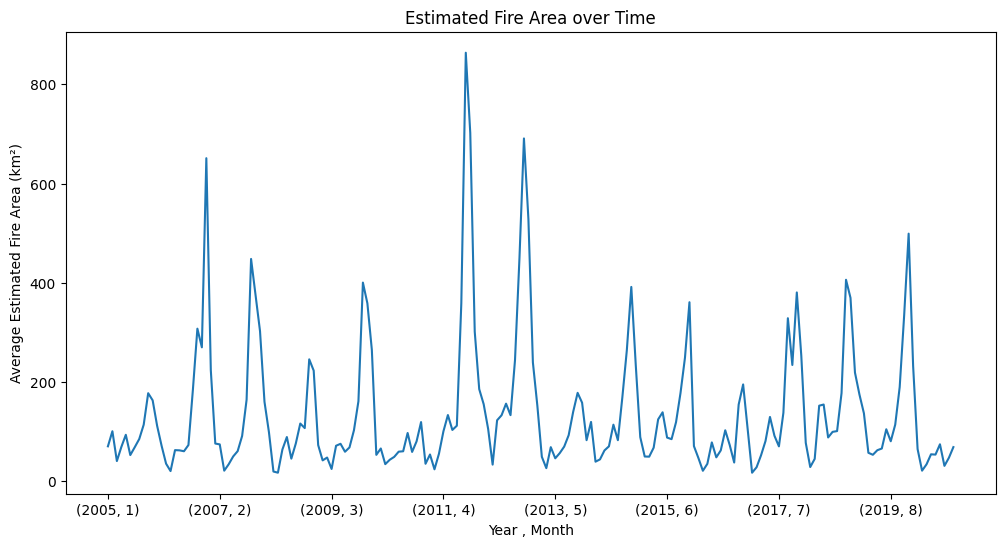

In [7]:
plt.figure(figsize=(12,6))
average_EFA_Year_Month=df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
average_EFA_Year_Month.plot(x=average_EFA_Year_Month.index, y=average_EFA_Year_Month.values)
plt.xlabel('Year , Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

In [8]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

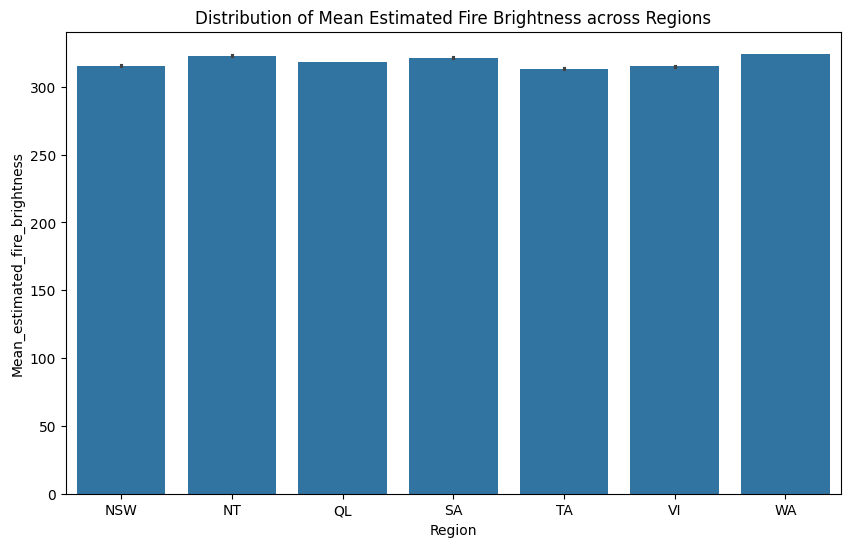

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean_estimated_fire_brightness')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

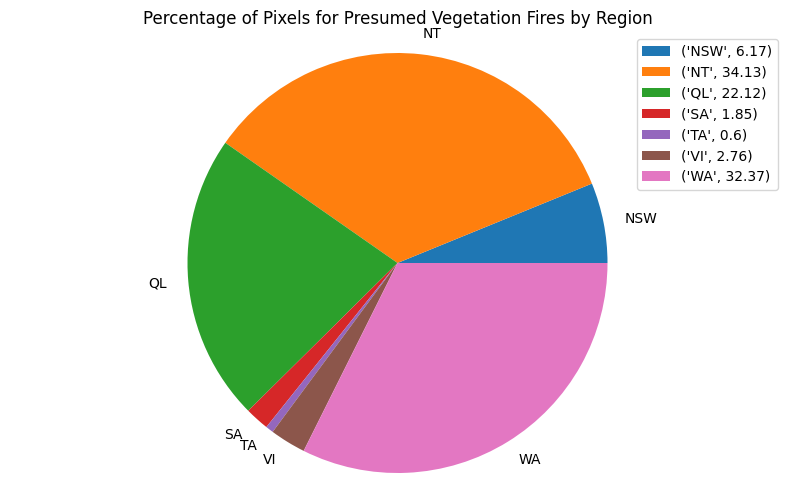

In [10]:
plt.figure(figsize=(10,6))
sum_region_counts=df.groupby('Region')['Count'].sum()
plt.pie(sum_region_counts, labels=sum_region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/sum_region_counts.sum()*100,2)) for i,k in zip(sum_region_counts.index, sum_region_counts)])
plt.axis('equal')
plt.show()

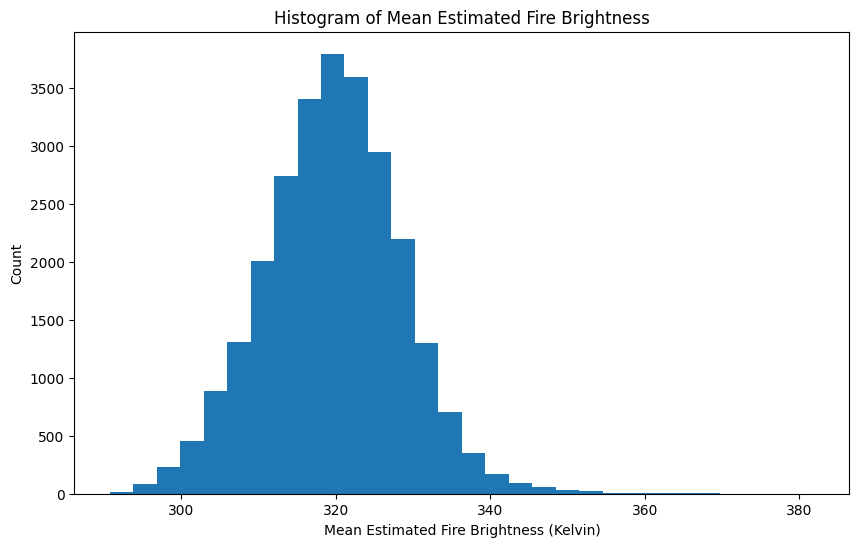

In [11]:
plt.figure(figsize=(10,6))
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=30)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

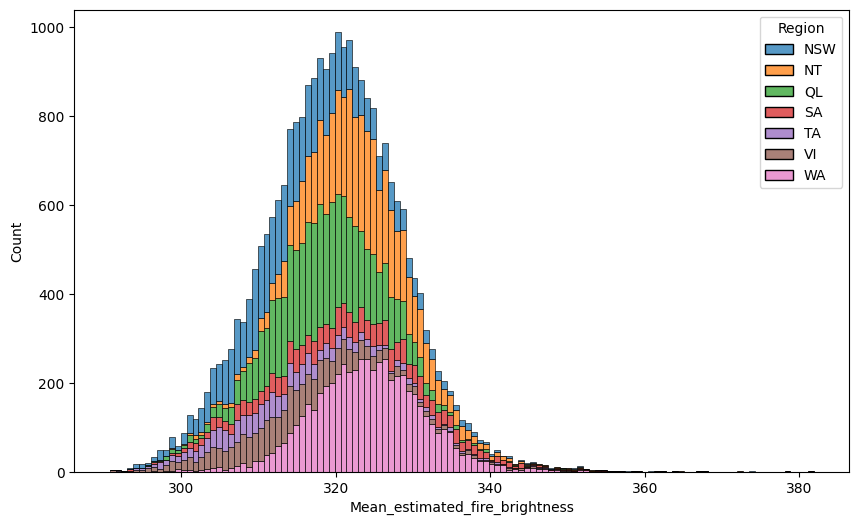

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

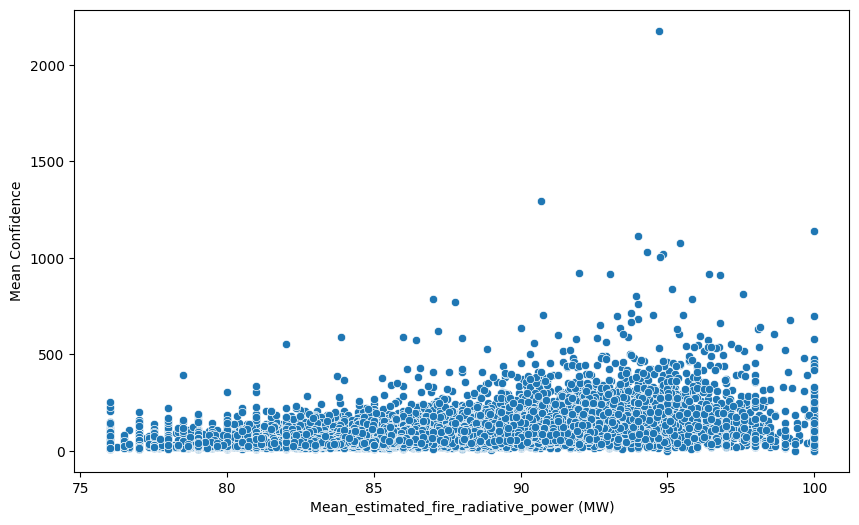

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean_estimated_fire_radiative_power (MW)')
plt.ylabel('Mean Confidence')
plt.show()

In [14]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [15]:
aus_region=folium.map.FeatureGroup()
aus_map = folium.Map(location=[-25, 135], zoom_start=4)
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_region.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5,
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

aus_map.add_child(aus_region)